In [1]:
from utils.dataloaders import get_face_dataloader
train_loader = get_face_dataloader(batch_size=32)

In [2]:
latent_spec = {'cont': 2,
               'disc': [10]}


In [3]:
from jointvae.models import VAE

model = VAE(latent_spec=latent_spec, img_size=(1,64, 64))

In [4]:
from torch import optim

# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)


In [5]:
from viz.visualize import Visualizer

viz = Visualizer(model)

In [6]:
from jointvae.training import Trainer
import numpy as np
# Define the capacities
# Continuous channels
cont_capacity = [0.0, 1.0, 5000, 1.0]     

disc_capacity = [0.0, np.log(3.0), 1000, 10.0]

trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity)


In [7]:
trainer.train(train_loader, epochs=3)

0/100	Loss: 2813.393
Epoch: 1 Average loss: 3599.34
0/100	Loss: 2809.781
Epoch: 2 Average loss: 3595.83
0/100	Loss: 2802.897
Epoch: 3 Average loss: 3588.97


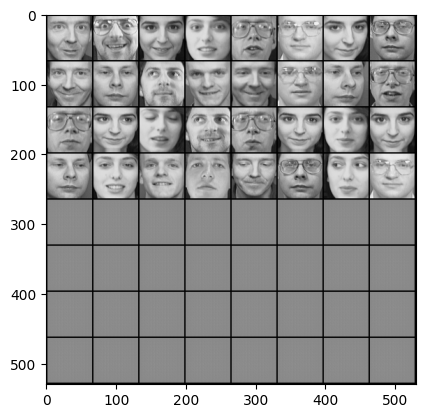

In [9]:
import matplotlib.pyplot as plt
for batch in train_loader:
    break
data, labels = batch

# Set save_images to False to return tensor instead of saving file
viz.save_images = False

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(data)

plt.imshow(recon.numpy()[0, :, :], cmap='gray')
plt.show()

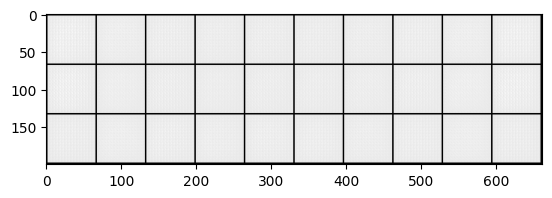

In [11]:
traversals = viz.all_latent_traversals(size=10)
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
